# Central Limit Theorem: Variance of Sample Means and Correlation

Published: January 5, 2018 <br />
Author: Anjani K Shiwakoti 

Central Limit Theorem is one of the top two most important theorems in probability and statistics, and the other being the Law of Large Numbers.

To illustrate the key concept of central limit theorem with an example, let's consider rolling a large number of identical, fair (unbiased) dice. CLT says that the distribution of the sum or average of the rolled numbers will ultimately produce a smooth bell curve (normal distribution) as the number of rolls we observe gets larger. Generally, given that each observation is randomly generated in a way that does not depend on the values of the other observations, and given that this procedure is performed sufficiently many times, the sum or the average converges in distribution toward normal even if the individual variables themselves are not normally distributed. Therefore, taking random samples comprising of independent and identically distributed variables is important in order to justify the approximation of large-sample statistics to the normal distribution in controlled experiments.


In [7]:
# import the Numpy and Datascience libraries
import numpy as np
import pandas as pd
#from datascience import *

# import data visualization framework libraries.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')


In [8]:
# read the csv file into pandas dataframe
df = pd.read_csv("employee-compensation.csv")

# drop any/all rows that have null values
df = df.dropna()

# preview what the data looks like
df.head()


,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Fiscal,2013,1,Public Protection,FIR,FIR Fire Department,798.0,"Firefighters - Miscellaneous, Local 798",H000,Fire Services,...,37216,123841.28,76853.77,14922.05,215617.10,24574.98,14920.13,3589.87,43084.98,258702.08
1,Fiscal,2014,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,261.0,"Laborers, Local 261",7500,Semi-Skilled & General Labor,...,24950,61137.60,7341.04,9218.74,77697.38,14897.71,12516.70,6117.99,33532.40,111229.78
2,Fiscal,2016,2,"Public Works, Transportation & Commerce",AIR,AIR Airport Commission,790.0,"SEIU - Miscellaneous, Local 1021",1400,"Clerical, Secretarial & Steno",...,27447,41192.82,0.00,390.00,41582.82,6996.41,11308.96,3200.69,21506.06,63088.88
3,Fiscal,2015,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,253.0,"Transport Workers - Transit Operators, Local 2...",9100,Street Transit,...,42001,66993.68,26633.83,4494.98,98122.49,21231.91,13417.45,7449.63,42098.99,140221.48
4,Fiscal,2013,2,"Public Works, Transportation & Commerce",DPW,DPW GSA - Public Works,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",5200,Professional Engineering,...,22142,74260.80,0.00,0.00,74260.80,13522.95,11989.39,5977.19,31489.53,105750.33


In [9]:
df.describe()

,Year,Organization Group Code,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
count,212982.000000,212982.000000,212982.000000,212982.000000,212982.000000,212982.000000,212982.000000,212982.000000,212982.000000,212982.000000,212982.000000,212982.000000,212982.000000
mean,2015.071640,2.980815,491.269985,28502.895235,63861.080787,4513.339258,3747.383230,72121.803274,12632.542561,9059.115777,4723.908791,26415.567129,98537.370403
std,1.410608,1.583156,333.681916,16471.161649,45422.185079,11332.197418,7511.728855,53006.962964,9660.327905,5026.283514,3932.671682,16899.452815,68672.045442
min,2013.000000,1.000000,1.000000,1.000000,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-28723.190000,-2946.530000,-9857.740000,-19814.440000,-74082.610000
25%,2014.000000,2.000000,236.000000,14217.000000,23231.877500,0.000000,0.000000,25206.157500,3225.762500,4282.695000,1582.555000,9335.750000,35509.190000
50%,2015.000000,2.000000,535.000000,28504.500000,63241.550000,0.000000,692.355000,68705.000000,12847.615000,12137.700000,4400.170000,30322.755000,98851.795000
75%,2016.000000,4.000000,790.000000,42838.000000,93238.032500,2877.317500,4543.540000,104419.032500,19126.000000,12832.487500,6952.720000,38508.152500,143252.560000
max,2017.000000,7.000000,990.000000,56987.000000,533985.940000,227313.620000,336726.340000,533985.940000,101306.010000,22270.120000,36815.390000,138503.520000,668412.410000


In [10]:
salaries_and_comps = pd.DataFrame(df[['Total Salary','Total Compensation']])
salaries_and_comps.head()

,Total Salary,Total Compensation
0,215617.10,258702.08
1,77697.38,111229.78
2,41582.82,63088.88
3,98122.49,140221.48
4,74260.80,105750.33


Visualizing the Data:

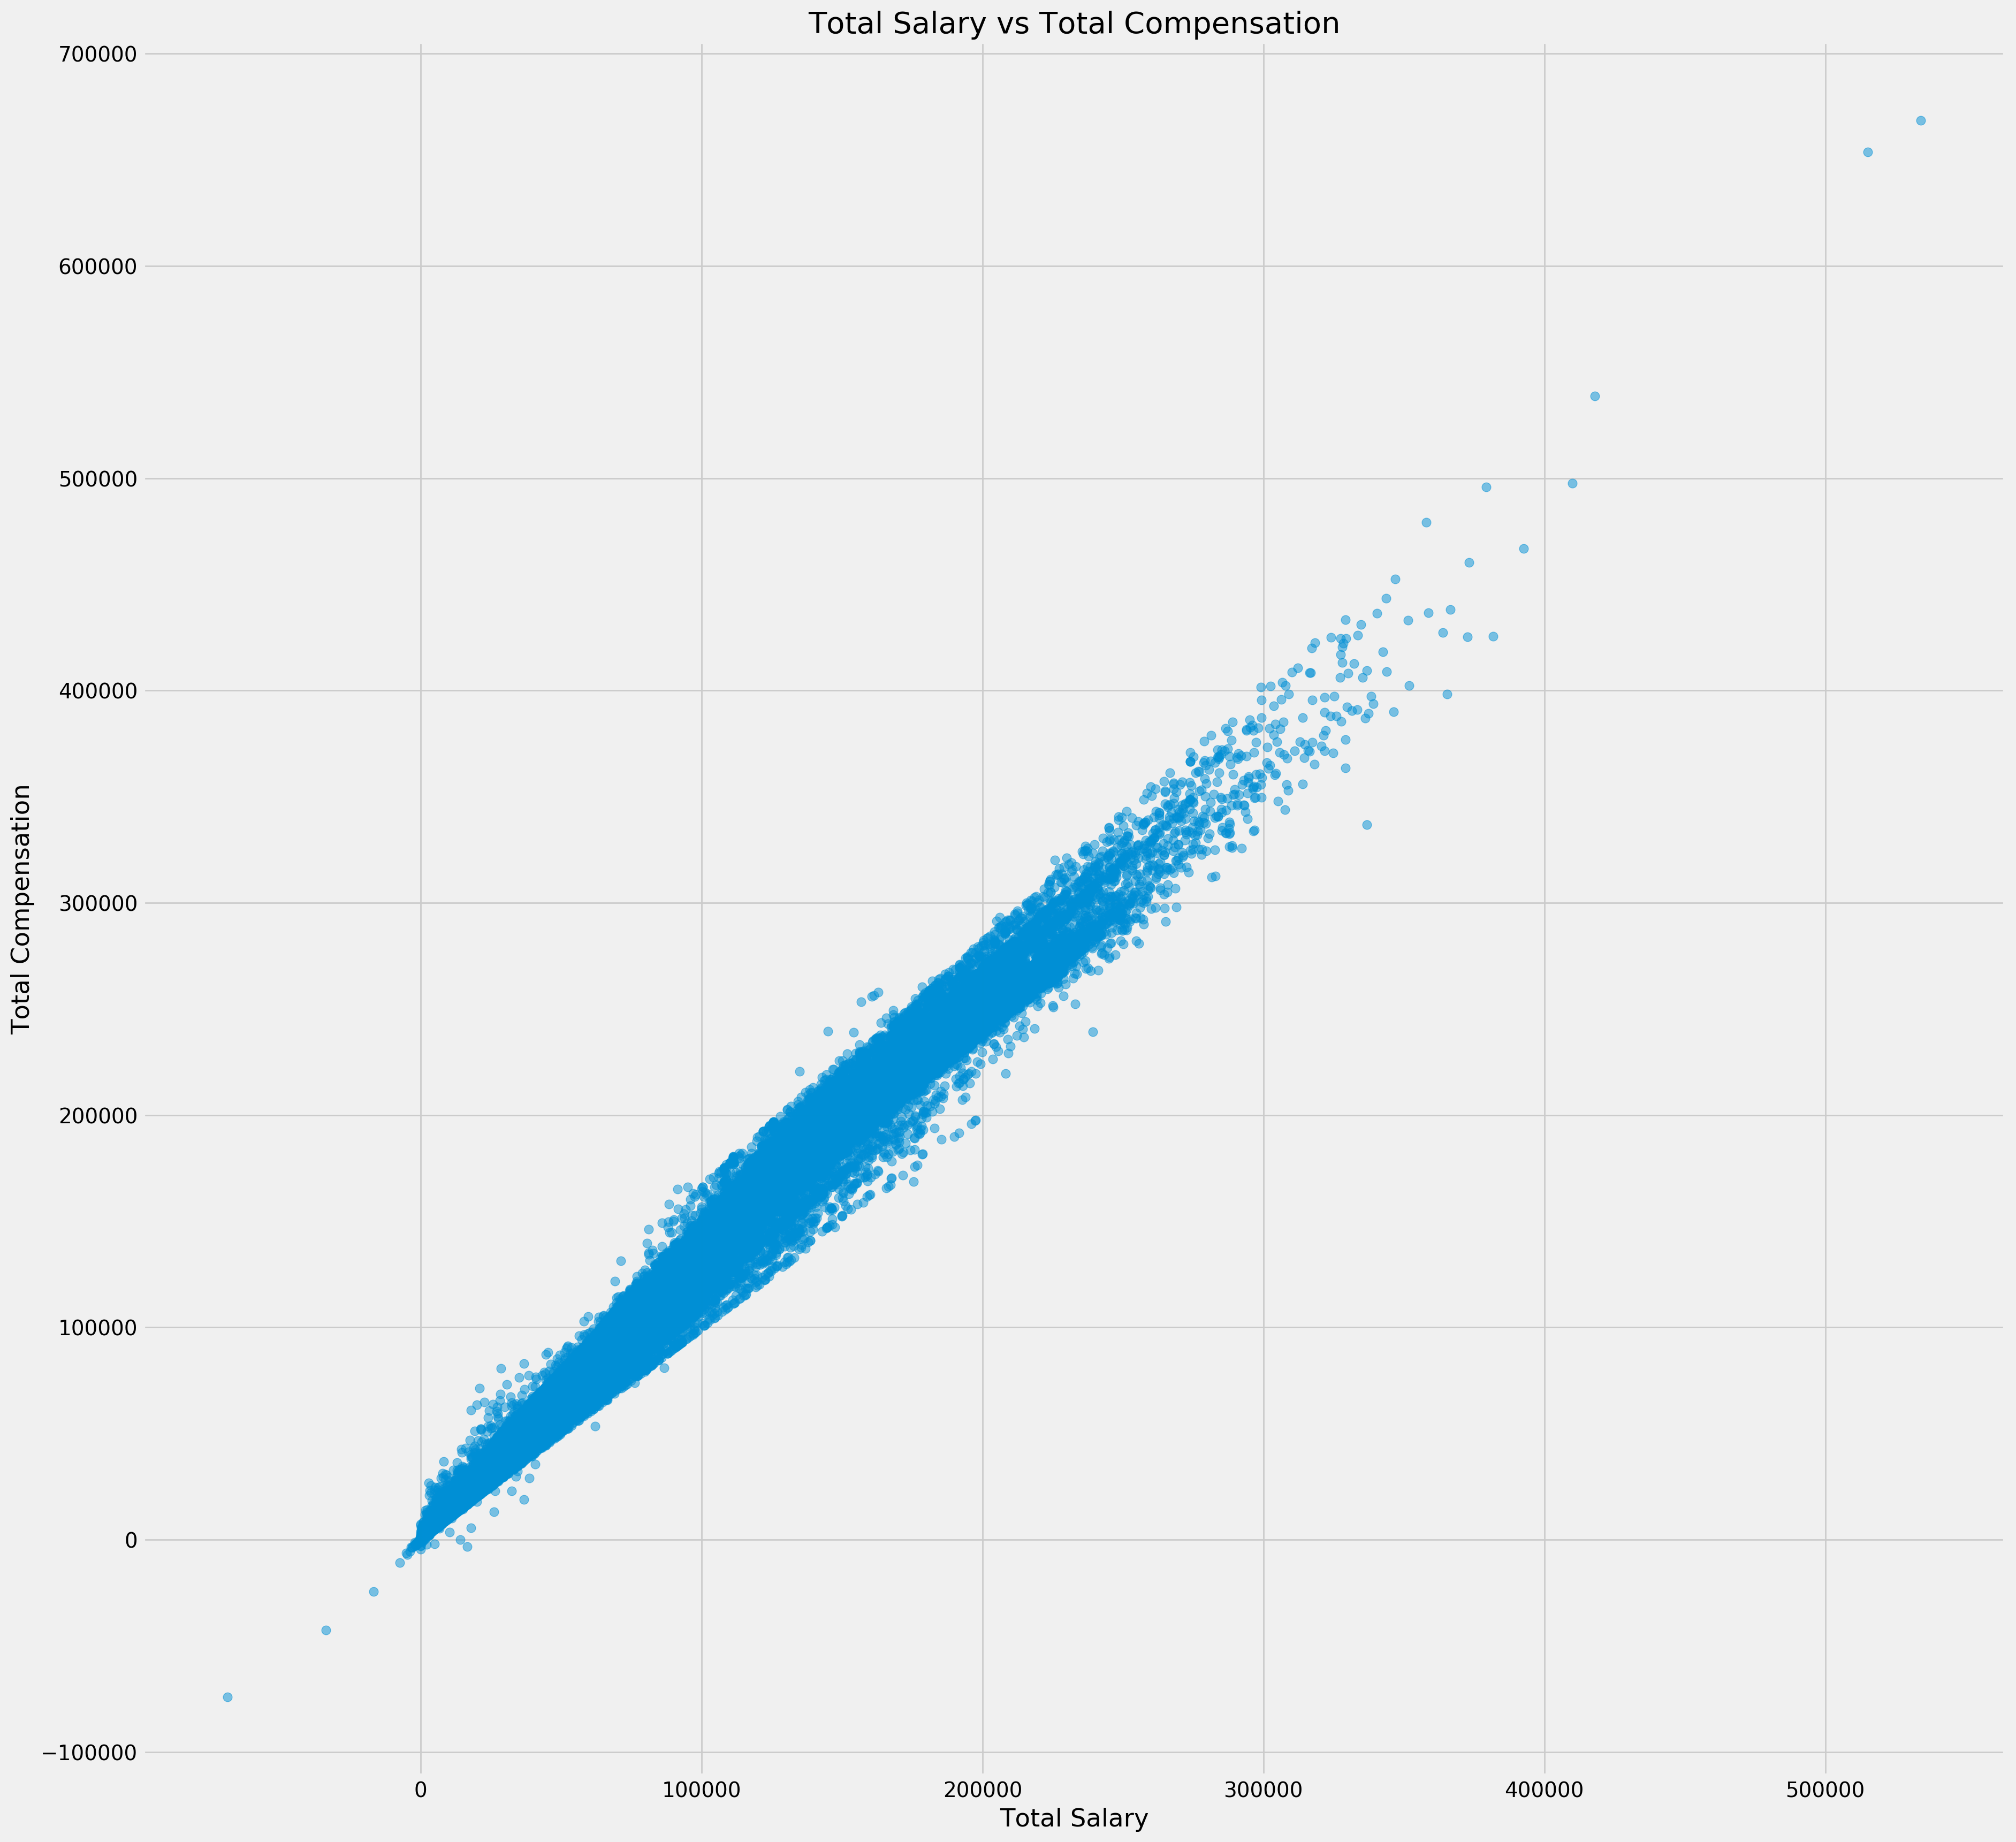

In [15]:
x = salaries_and_comps[['Total Salary']]
y = salaries_and_comps[['Total Compensation']]
plots.figure(figsize=(20,20), dpi=200)
plots.scatter(x, y, marker = 'o', alpha = 0.50)
plots.title("Total Salary vs Total Compensation")
plots.xlabel("Total Salary")
plots.ylabel("Total Compensation")
plots.show()

## Correlation:
In this section we will compare the population mean and standard deviation with that of its standard units and try to establish a relationship between the two. Looking at the scatter plot, does the association between wait times and eruption durations appear to be linear?

To answer that, we must first convert the data in standard units:  
(some_number - np.mean(some_number)) / np.std(some_number)


In [12]:
# convert total salary and total compensation to their respective standard units
salary_std = np.std(x)
salary_mean = np.mean(x)
salary_standard_units = np.array((x - salary_mean)/salary_std)

comp_std = np.std(y)
comp_mean = np.mean(y)
comp_standard_units = np.array((y - comp_mean)/comp_std)

combined_df = np.concatenate([salary_standard_units, comp_standard_units], axis=1)

salary_comp_standardized = pd.DataFrame(columns = ['Salary (standard units)', 'Compensation (standard units)'], 
                                        data = combined_df)
salary_comp_standardized.head()

,Salary (standard units),Compensation (standard units)
0,2.707109,2.332319
1,0.105186,0.184827
2,-0.576133,-0.516201
3,0.490516,0.607004
4,0.040353,0.105035


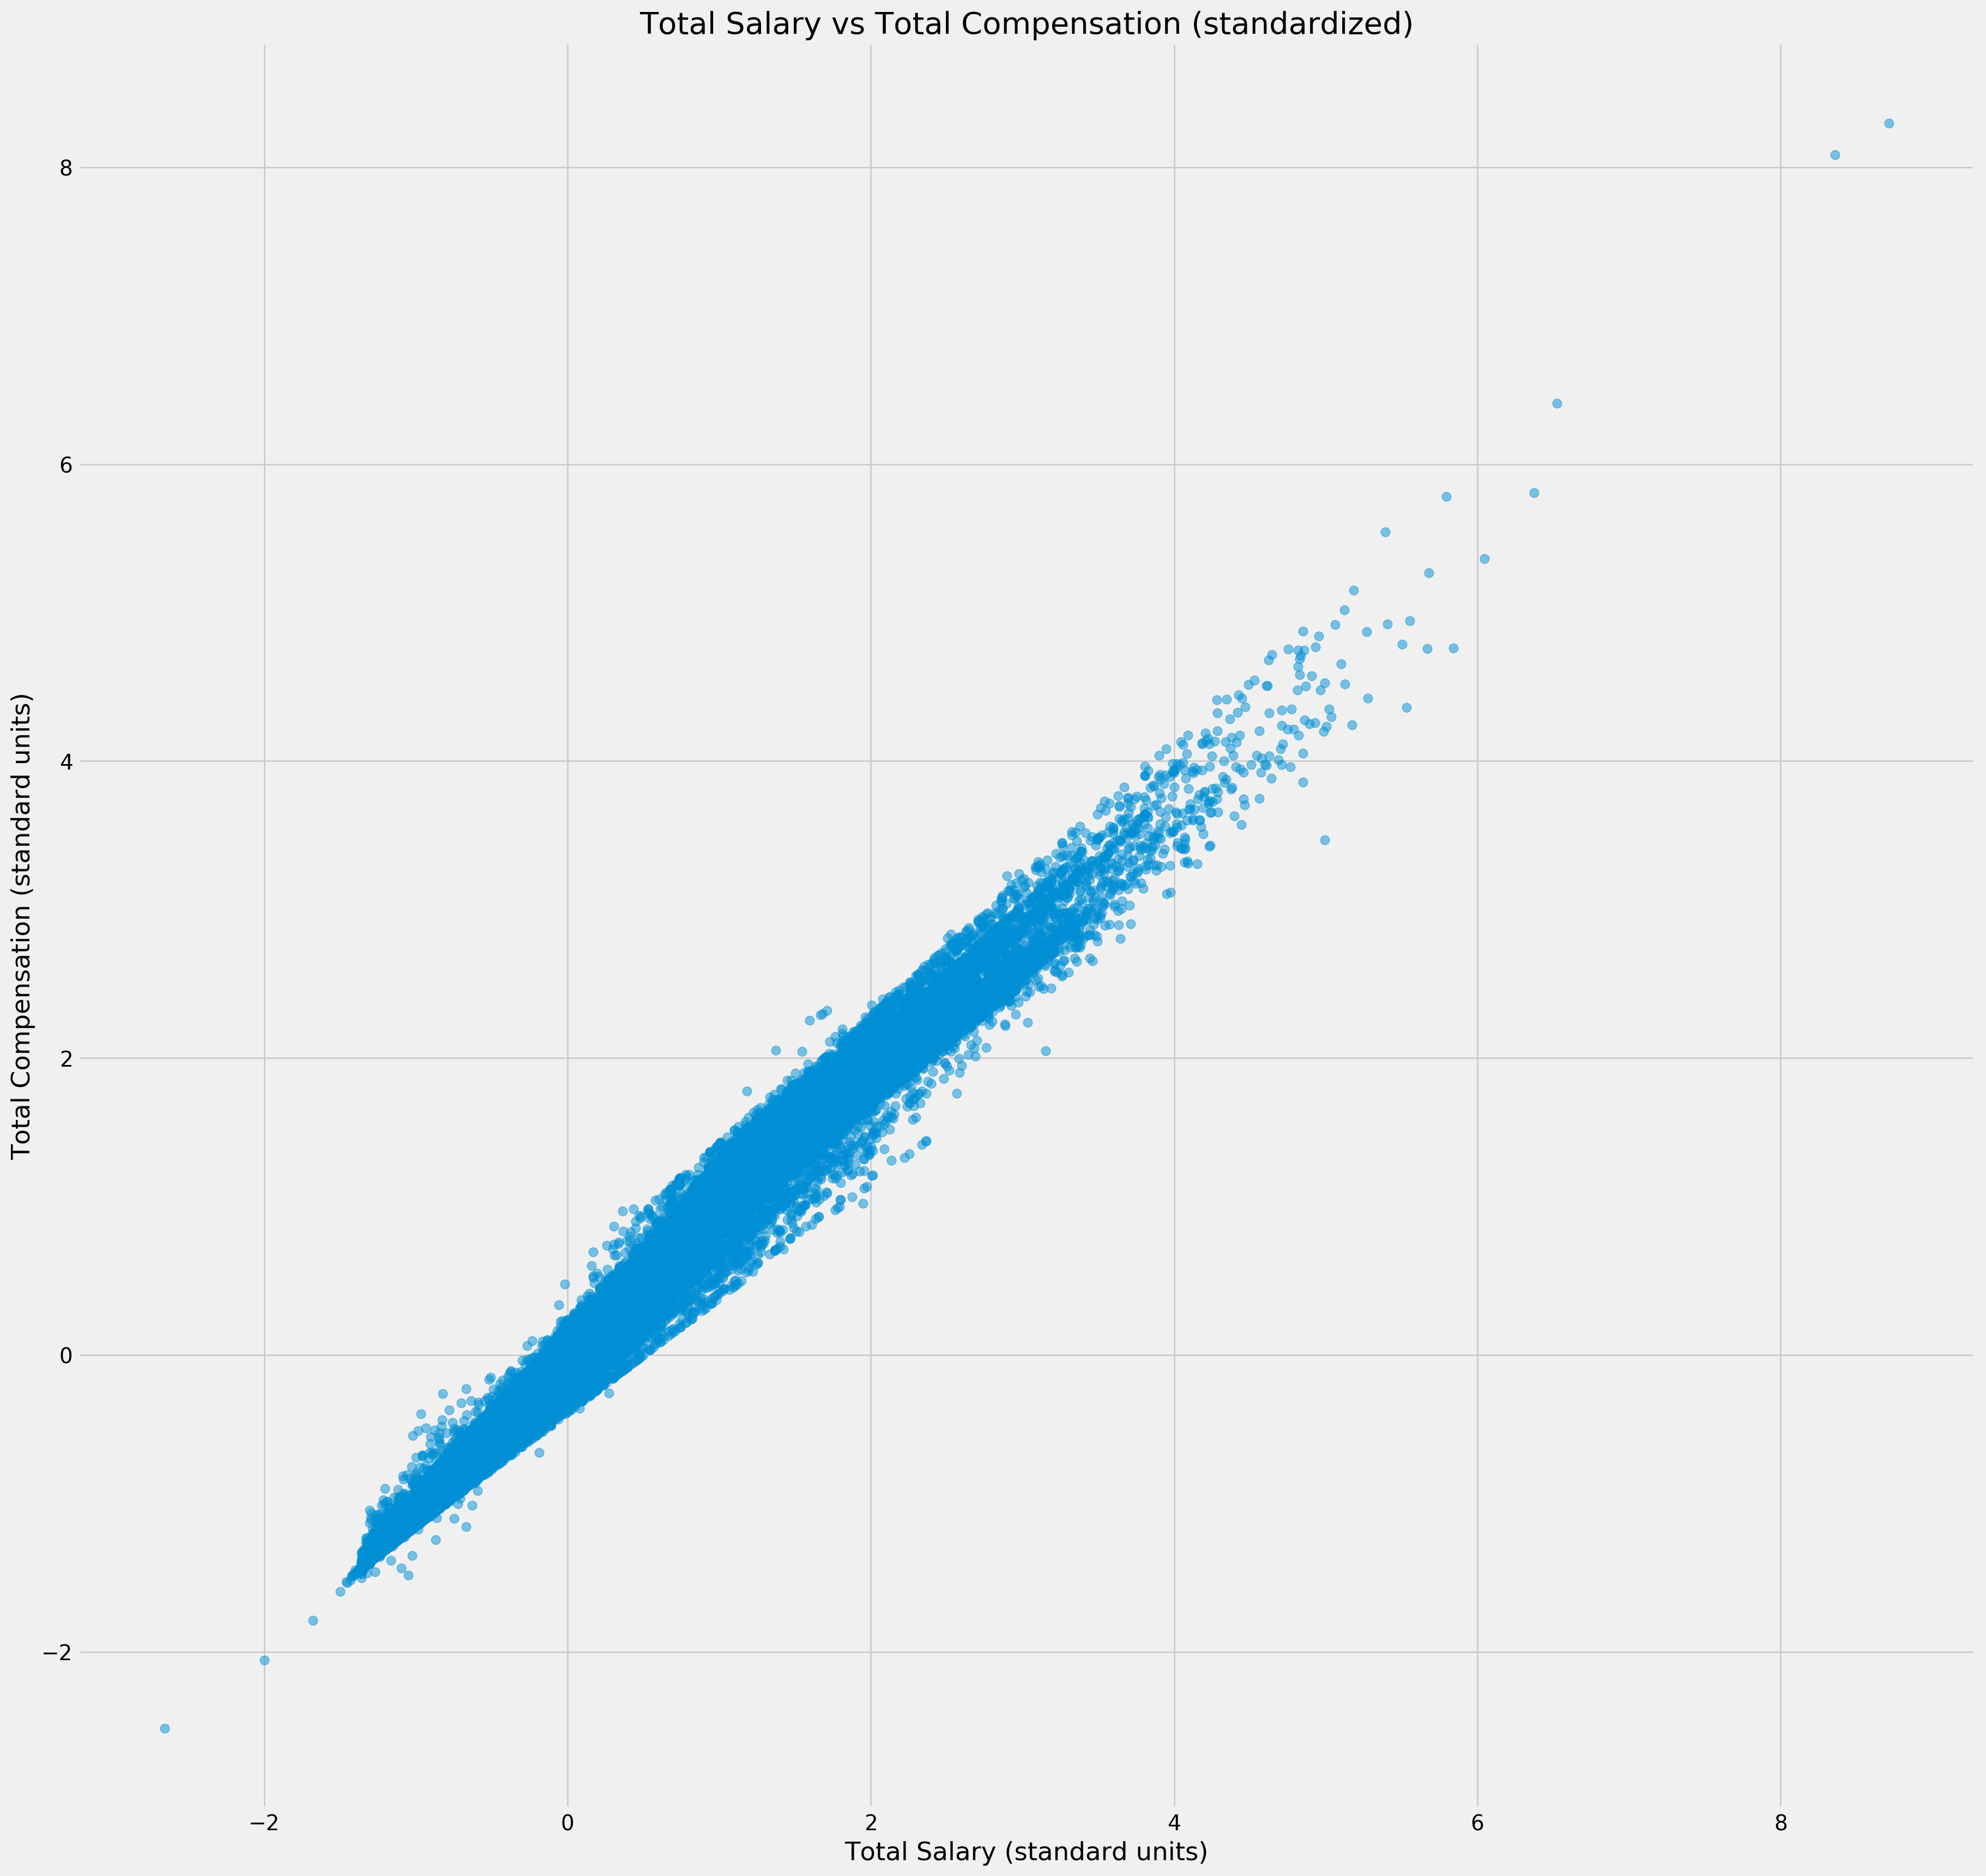

In [14]:
x_su = salary_comp_standardized.iloc[:,0]
y_su = salary_comp_standardized.iloc[:,1]
plots.figure(figsize=(20,20), dpi=200)
plots.scatter(x_su, y_su, marker = 'o', alpha = 0.50)
plots.title("Total Salary vs Total Compensation (standardized)")
plots.xlabel("Total Salary (standard units)")
plots.ylabel("Total Compensation (standard units)")
plots.show()

Notice that this plot looks exactly the same as the previous one! The resulting pattern it makes is the same as though it were plotting the original data. The data points really are different, but the axes are scaled differently. We can say that there's a linear association between the two variables being compared. The overall relationship is positive, which means that the higher the salary the higher the total compensation.

In [21]:
# calculate correlation coefficients

# Correlation coefficient 'r' is the average (mean) of the products of the standard units
r = np.mean(x_su * y_su)
print ("Correlation = ", r)

# alternative way to compute correlation 'r'
#correlation_coef = salary_comp_standardized.corr(method='pearson')
#correlation_coef

Correlation =  0.9944786222484682


## Variability of the Sample Mean

In our simulations below, we will notice that the means of larger samples tend to be more tightly clustered around the population mean than means of smaller samples. In this section, we will quantify the variability of the sample mean and try to establish a relation between the variability and the sample size.

Let's take a look at the salaries of employees of the City of San Francisco available on Kaggle dataset. The mean salary is $63861.08.

In [22]:
salary_mean = np.mean(df['Salaries'])
salary_mean

63861.08078701746

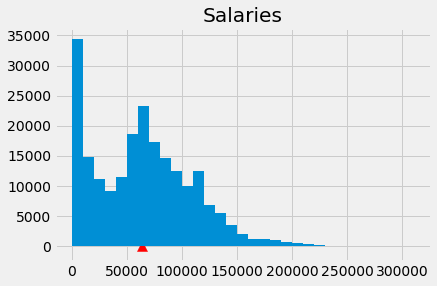

In [23]:
df.hist('Salaries', bins=np.arange(0, 300000+10000*2, 10000))
plots.scatter(salary_mean, 0, marker='^', color='red', s=100);

The histogram above clearly illustrates that the population does not follow a normal distribution. 

Let's take some random samples and look at the probability distribution of the sample mean. We will employ simulation to get an empirical approximation to this distribution.


In [24]:
def simulate_sample_mean(passed_df, label, sample_size, repetitions):
    """
    Calculate empirical distribution of random sample means by simulation
    Arguments: the name of the table, the label of the column containing the variable, 
    the sample size, and the number of simulations.
    """
    
    means = []

    # Calculate mean from random sample for given sample size and repetitions
    # Put each new computed mean value in a list of means
    for i in np.arange(repetitions):
        
        # In pandas dataframe sample method, 'with replacement' is False by default
        # So we must set replace=True
        new_sample = passed_df.sample(sample_size, replace=True) 
        new_sample_mean = np.mean(new_sample[label])
        means = np.append(means, new_sample_mean)
     
    # Create a table with the above means and give it a label
    sample_means = pd.DataFrame.from_dict({'Sample Means': means})
    #print (sample_means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist('Sample Means', bins = 20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    
    stats_dict = {'Sample Size': sample_size,
                  'Population Mean': np.mean(passed_df[label]),
                  'Average of Sample Means': np.mean(means),
                  'Standard Deviation of Population': np.std(passed_df[label]),
                  'Standard Deviation of Sample Means': np.std(means)}
    
    stats_df = pd.DataFrame.from_dict(stats_dict, orient='index')
    print (stats_df)
    

Now create a sample of size 100 from the original dataframe and graph it using our new `simulate_sample_mean` function. Then, in the following two cells, simulate the mean of a random sample of 500 salaries and 1000 salaries, respectively. In each case, perform 10,000 repetitions of each of these processes. The `plots.xlim` line just makes sure that all of the plots have the same x-axis. 

                                               0
Sample Size                           100.000000
Population Mean                     63861.080787
Average of Sample Means             63901.342489
Standard Deviation of Population    45422.078445
Standard Deviation of Sample Means   4526.963498


(50000, 100000)

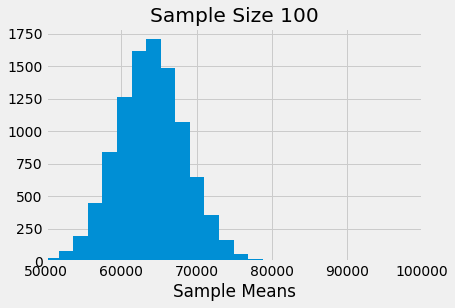

In [25]:
simulate_sample_mean(df, 'Salaries', 100, 10000) 
plots.xlim(50000, 100000)

                                               0
Sample Size                           500.000000
Population Mean                     63861.080787
Average of Sample Means             63852.473076
Standard Deviation of Population    45422.078445
Standard Deviation of Sample Means   2033.990042


(50000, 100000)

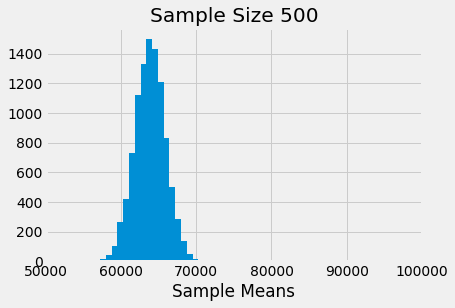

In [26]:
simulate_sample_mean(df, 'Salaries', 500, 10000)
plots.xlim(50000, 100000)

                                               0
Sample Size                          1000.000000
Population Mean                     63861.080787
Average of Sample Means             63863.315669
Standard Deviation of Population    45422.078445
Standard Deviation of Sample Means   1422.300008


(50000, 100000)

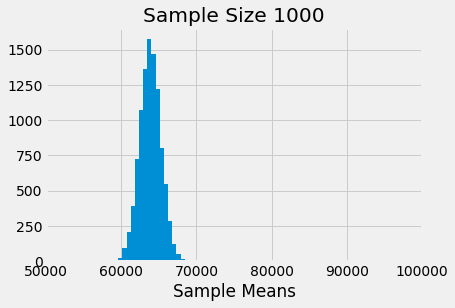

In [27]:
simulate_sample_mean(df, 'Salaries', 1000, 10000)
plots.xlim(50000, 100000)

The Central Limit Theorem in Action:

1. Each of the histograms of the sample means are roughly normal, even though the histogram of the salaries themselves is far from normal.

2. Each of the three histograms of the sample means is centered very close to the population mean. In each case, the "average of sample means" is very close to the population mean. As expected, the sample mean is an unbiased estimate of the population mean.

As we can see from above simulations, the bell curve is centered at the population mean. Some of the sample means are higher, and some lower, but the deviations from the population mean are roughly symmetric on either side. This can be reproduced over and over again. Formally, probability theory shows that the sample mean is an unbiased estimate of the population mean.

Now let's look at what happens when we take a fixed sample, then bootstrap from it with different numbers of resamples. How does the distribution of the resampled means change?

In [28]:
bootstrap_sampled_SD = 3

                                               0
Sample Size                           100.000000
Population Mean                     63861.080787
Average of Sample Means             63758.076948
Standard Deviation of Population    45422.078445
Standard Deviation of Sample Means   4603.742173


(50000, 100000)

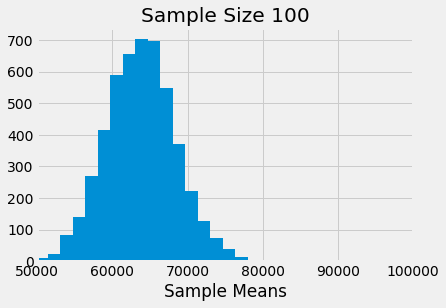

In [29]:
simulate_sample_mean(df, 'Salaries', 100, 5000)
plots.xlim(50000, 100000)

                                               0
Sample Size                           100.000000
Population Mean                     63861.080787
Average of Sample Means             63908.306934
Standard Deviation of Population    45422.078445
Standard Deviation of Sample Means   4532.182948


(50000, 100000)

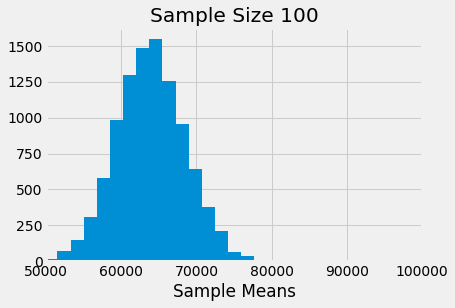

In [30]:
simulate_sample_mean(df, 'Salaries', 100, 10000)
plots.xlim(50000, 100000)

In [31]:
bootstrap_sampled_SD = 3

                                               0
Sample Size                           100.000000
Population Mean                     63861.080787
Average of Sample Means             63851.708931
Standard Deviation of Population    45422.078445
Standard Deviation of Sample Means   4547.914229


(50000, 100000)

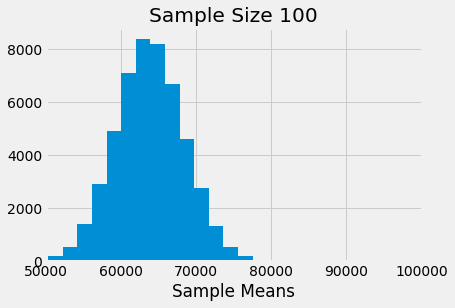

In [32]:
simulate_sample_mean(df, 'Salaries', 100, 50000)
plots.xlim(50000, 100000)

Next, let's think about how the relationships between population SD, sample SD, and SD of sample means change with varying sample size. We can see that the Sample SD becomes more consistent with population SD with increasing sample size, SD of sample means gets smaller with increasing sample size.


Let's do further simulations using smaller to larger random samples while keeping the number of simulations constant and see how the sample mean and sample SD vary from the population mean and standard deviation. First, we calculate the population SD so that we can compare the SD of each sample to the SD of the population.

In [33]:
pop_sd = np.std(df['Salaries'])
pop_sd

45422.07844543734

Sample Standard Deviation:  52625.42010538576
                                               0
Sample Size                            10.000000
Population Mean                     93043.190000
Average of Sample Means             92902.853087
Standard Deviation of Population    52625.420105
Standard Deviation of Sample Means  16348.383656


(10000, 120000)

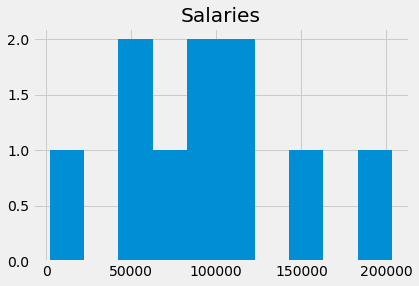

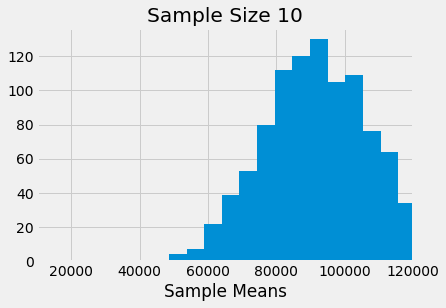

In [34]:
sample_10 = df.sample(10)
sample_10.hist('Salaries')

print("Sample Standard Deviation: ", np.std(sample_10['Salaries']))

simulate_sample_mean(sample_10, 'Salaries', 10, 1000)

plots.xlim(10000, 120000)
#plots.ylim(0, .00025);


Sample Standard Deviation:  43534.32979347059
                                               0
Sample Size                           200.000000
Population Mean                     61450.194050
Average of Sample Means             61391.803819
Standard Deviation of Population    43534.329793
Standard Deviation of Sample Means   3031.803621


(10000, 120000)

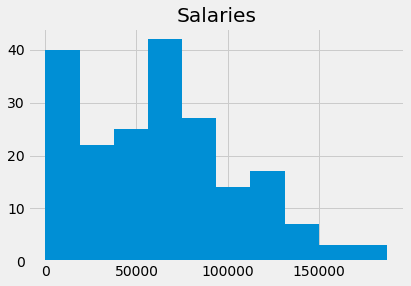

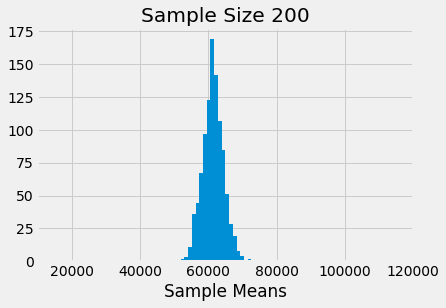

In [35]:
sample_200 = df.sample(n=200, random_state = 1)

sample_200.hist("Salaries")
print("Sample Standard Deviation: ", np.std(sample_200['Salaries']))
simulate_sample_mean(sample_200, 'Salaries', 200, 1000)
plots.xlim(10000,120000)
#plots.ylim(0, .00025);

Sample Standard Deviation:  45792.420835924226
                                               0
Sample Size                          1000.000000
Population Mean                     65578.659370
Average of Sample Means             65458.341187
Standard Deviation of Population    45792.420836
Standard Deviation of Sample Means   1451.856796


(10000, 120000)

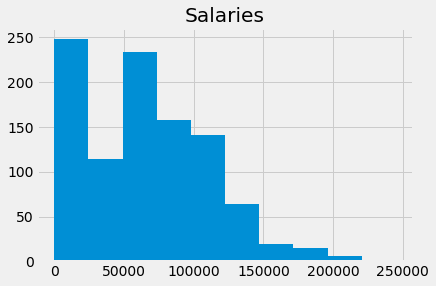

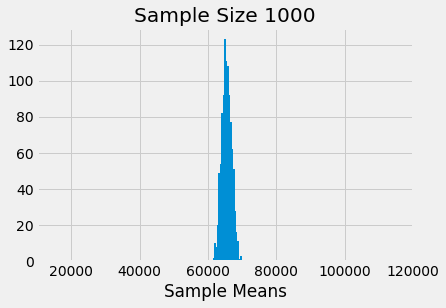

In [36]:
sample_1000 = df.sample(n=1000, random_state = 1)
sample_1000.hist("Salaries")
print("Sample Standard Deviation: ", np.std(sample_1000['Salaries']))
simulate_sample_mean(sample_1000, 'Salaries', 1000, 1000)
plots.xlim(10000,120000)
#plots.ylim(0, .00025);

Let's illustrate this trend. Below, you will see how the average absolute error of SD from the population changes with sample size (N).

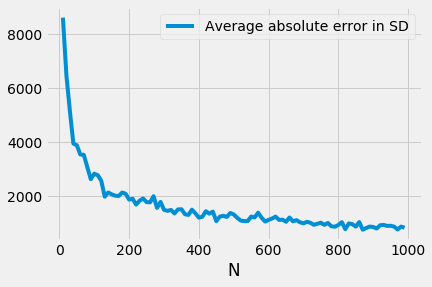

In [39]:
# let's visualize Average absolute error in SD vs number of samples N
sample_n_errors = []
for i in np.arange(10, 1000, 10):
    sample_n_errors = np.append(sample_n_errors, 
                                np.average([abs(np.std(df.sample(i)['Salaries'])-pop_sd) for d in np.arange(100)]))

samples_error_nums = pd.DataFrame.from_dict({"Average absolute error in SD": sample_n_errors, 
                                             "N": np.arange(10, 1000, 10)})

samples_error_nums.plot("N", "Average absolute error in SD")


Looking at the chart, we can confidently say that the distribution of the sample increasingly tends towards the distribution of the original ppopulation as we get to larger sample sizes. The sample size and abosulute error in standard deviation have an inverse relationship, i.e., the larger the sample the smaller the absolute error in standard deviation. In other words, we can infer that as the sample size tends to infinity, the absolute error in standard deviation tends to zero.

----------------------------------------------------------------------------------------------------------------------------